In [73]:
import warnings
import numpy as np
import scipy.stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dataprep.eda import create_report
from pandas.core.common import SettingWithCopyWarning

In [74]:
cmap='seismic'
sns.set_palette(sns.color_palette(cmap))
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

Find correlation between stai stress score and fitbit stress score

In [75]:
fitbit_stai = pd.read_pickle('data/fitbit_stai_to_model.pkl')
cols = list(fitbit_stai.columns)
removed_ele = ['id', 'date', 'stai_stress_category']
for ele in removed_ele:
    cols.remove(ele)
for column in cols:
    fitbit_stai[column] = pd.to_numeric(fitbit_stai[column])
fitbit_stai

,id,date,stai_stress,stai_stress_category,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,...,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates
0,621e2e8e67b776a24055b564,2021-05-31,45.0,Below average,34.408304,57.481,94.303,NaN,14.8,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,621e2e8e67b776a24055b564,2021-06-07,46.0,Average,34.476865,56.570,109.509,NaN,14.4,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,621e2e8e67b776a24055b564,2021-07-19,46.0,Average,34.254286,57.330,100.374,NaN,15.0,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,621e2e8e67b776a24055b564,2021-07-26,46.0,Average,34.515655,59.798,98.515,NaN,15.4,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,621e2e8e67b776a24055b564,2021-06-28,54.0,Above average,34.418045,53.006,107.388,NaN,15.6,76.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,621e339967b776a240e502de,2021-11-22,49.0,Average,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,621e339967b776a240e502de,2021-12-06,51.0,Above average,34.674633,51.192,49.232,96.2,12.2,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
276,621e339967b776a240e502de,2021-12-14,45.0,Below average,34.303759,46.311,56.468,96.5,11.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
277,621e339967b776a240e502de,2021-12-20,48.0,Average,34.876472,50.683,47.293,96.0,11.6,82.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
correlation_stai = fitbit_stai[['stai_stress', 'stress_score']]
correlation_stai

,stai_stress,stress_score
0,45.0,81.0
1,46.0,83.0
2,46.0,75.0
3,46.0,74.0
4,54.0,76.0
...,...,...
274,49.0,NaN
275,51.0,83.0
276,45.0,87.0
277,48.0,82.0


In [77]:
correlation_stai.dropna(inplace=True)
correlation_stai

,stai_stress,stress_score
0,45.0,81.0
1,46.0,83.0
2,46.0,75.0
3,46.0,74.0
4,54.0,76.0
...,...,...
273,49.0,81.0
275,51.0,83.0
276,45.0,87.0
277,48.0,82.0


Scatter plot with fitbit and stai

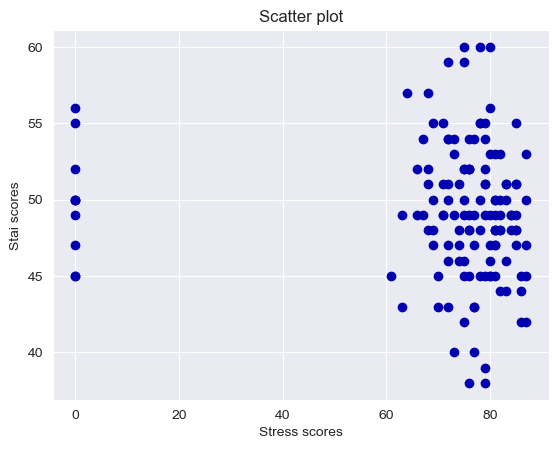

In [78]:
stress_scores = list(correlation_stai['stress_score'])
stai_scores = list(correlation_stai['stai_stress'])

plt.scatter(stress_scores, stai_scores)
plt.xlabel("Stress scores")
plt.ylabel("Stai scores")
plt.title("Scatter plot")
plt.show()

Pearson correlation between fitbit and stai stress scores

In [79]:
correlation = scipy.stats.pearsonr(stress_scores,stai_scores)[0]
print("Fitbit stress score vs Stai stress score = ", correlation)

Fitbit stress score vs Stai stress score =  -0.07964959702477661


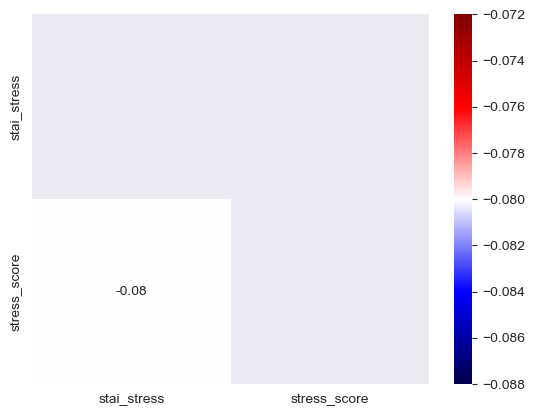

In [80]:
correlation_matrix = correlation_stai.corr().round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(data=correlation_matrix, annot=True,cmap=cmap,mask=mask)

Find correlation between panas negative/positive affect score and fitbit stress score

In [81]:
fitbit_panas = pd.read_pickle('data/fitbit_panas_to_model.pkl')
cols = list(fitbit_panas.columns)
removed_ele = ['id', 'date']
for ele in removed_ele:
    cols.remove(ele)
for column in cols:
    fitbit_panas[column] = pd.to_numeric(fitbit_panas[column])
fitbit_panas

,id,date,positive_affect_score,negative_affect_score,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,...,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates
0,621e2e8e67b776a24055b564,2021-07-26,37,14,34.515655,59.798,98.515,NaN,15.4,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,621e2e8e67b776a24055b564,2021-05-31,38,12,34.408304,57.481,94.303,NaN,14.8,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,621e2e8e67b776a24055b564,2021-06-07,37,12,34.476865,56.570,109.509,NaN,14.4,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,621e2e8e67b776a24055b564,2021-06-28,31,12,34.418045,53.006,107.388,NaN,15.6,76.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,621e2e8e67b776a24055b564,2021-07-19,37,12,34.254286,57.330,100.374,NaN,15.0,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,621e339967b776a240e502de,2021-12-20,44,13,34.876472,50.683,47.293,96.0,11.6,82.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
264,621e339967b776a240e502de,2021-12-27,45,11,35.107574,54.325,47.929,95.4,12.2,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
265,621e339967b776a240e502de,2022-01-03,44,11,34.957428,52.810,47.801,94.9,12.4,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
266,621e339967b776a240e502de,2022-01-12,45,13,34.073346,51.364,51.324,96.1,12.2,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [82]:
correlation_panas = fitbit_panas[['positive_affect_score', 'negative_affect_score', 'stress_score']]
correlation_panas

,positive_affect_score,negative_affect_score,stress_score
0,37,14,74.0
1,38,12,81.0
2,37,12,83.0
3,31,12,76.0
4,37,12,75.0
...,...,...,...
263,44,13,82.0
264,45,11,87.0
265,44,11,81.0
266,45,13,84.0


In [83]:
correlation_panas.dropna(inplace=True)
correlation_panas

,positive_affect_score,negative_affect_score,stress_score
0,37,14,74.0
1,38,12,81.0
2,37,12,83.0
3,31,12,76.0
4,37,12,75.0
...,...,...,...
263,44,13,82.0
264,45,11,87.0
265,44,11,81.0
266,45,13,84.0


Scatter plot with fitbit and panas positive

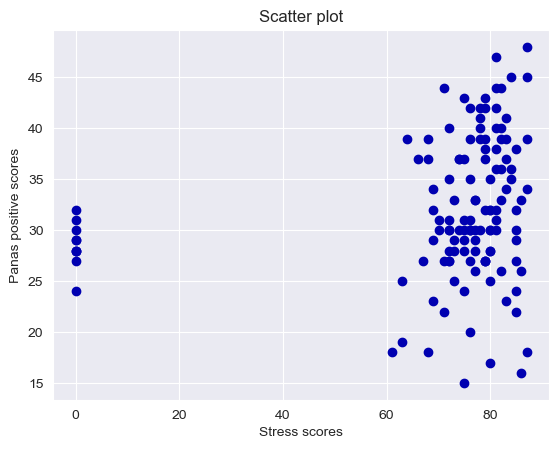

In [84]:
panas_positive_scores = list(correlation_panas['positive_affect_score'])
stress_scores = list(correlation_panas['stress_score'])

plt.scatter(stress_scores, panas_positive_scores)
plt.xlabel("Stress scores")
plt.ylabel("Panas positive scores")
plt.title("Scatter plot")
plt.show()

Scatter plot with fitbit and panas negative

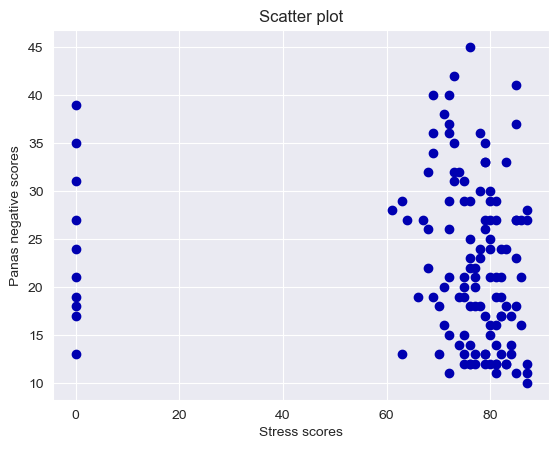

In [85]:
panas_negative_scores = list(correlation_panas['negative_affect_score'])

plt.scatter(stress_scores, panas_negative_scores)
plt.xlabel("Stress scores")
plt.ylabel("Panas negative scores")
plt.title("Scatter plot")
plt.show()

Pearson correlation between fitbit stress score and negative affect scores

In [86]:
correlation_negative = scipy.stats.pearsonr(stress_scores,panas_negative_scores)[0]
correlation_positive = scipy.stats.pearsonr(stress_scores,panas_positive_scores)[0]
print("Fitbit stress score vs Panas negative affect score = ", correlation_negative)
print("Fitbit stress score vs Panas positive affect score = ", correlation_positive)

Fitbit stress score vs Panas negative affect score =  -0.11708181877905355
Fitbit stress score vs Panas positive affect score =  0.1918342569777661


Correlation matrix between fitbit and panas

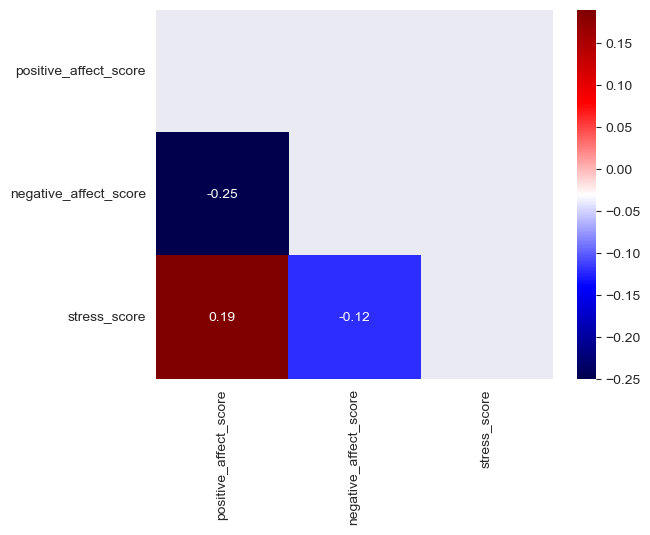

In [87]:
correlation_matrix = correlation_panas.corr().round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(data=correlation_matrix, annot=True,cmap=cmap,mask=mask)